In [29]:
"""
https://www.tensorflow.org/tutorials/quickstart/beginner
"""
import tensorflow as tf
import datetime

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.11.0


In [30]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [32]:
predictions = model(x_train[:1]).numpy()


In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

log_dir = "../logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.9146 - val_loss: 0.1401 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1439 - accuracy: 0.9572 - val_loss: 0.1038 - val_accuracy: 0.9684
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1084 - accuracy: 0.9669 - val_loss: 0.0862 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0904 - accuracy: 0.9726 - val_loss: 0.0768 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0779 - accuracy: 0.9757 - val_loss: 0.0784 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0669 - accuracy: 0.9787 - val_loss: 0.0707 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9812 - val_loss: 0.0714 - val_accuracy:

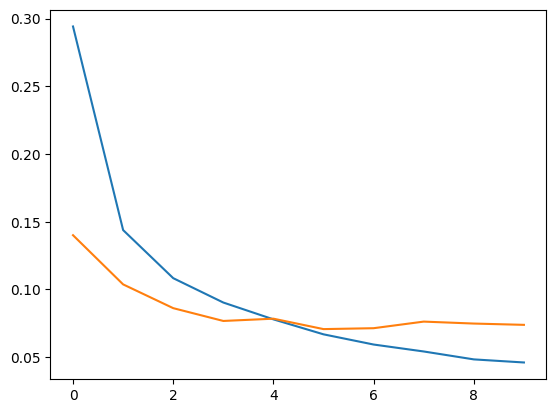

In [34]:
history = model.fit(x_train, y_train, epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [35]:
model.evaluate(x_test, y_test, verbose=2)


313/313 - 0s - loss: 0.0739 - accuracy: 0.9773 - 275ms/epoch - 880us/step


[0.07387493550777435, 0.9772999882698059]

In [36]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.26862112e-08, 7.30549857e-11, 2.44272456e-07, 3.90685200e-05,
        1.05542821e-14, 1.91923366e-09, 6.54380399e-17, 9.99960542e-01,
        8.67713623e-10, 7.00844112e-08],
       [3.39306708e-11, 3.81203648e-07, 9.99999046e-01, 5.31545368e-07,
        1.32812275e-23, 1.53841620e-10, 1.14453669e-10, 6.49949887e-17,
        6.79620471e-10, 1.70826367e-19],
       [3.18076907e-08, 9.99683142e-01, 1.20200166e-04, 3.74628621e-06,
        4.79964547e-06, 1.99655847e-06, 1.59502215e-05, 7.19275340e-05,
        9.81662815e-05, 3.54383900e-08],
       [9.99927402e-01, 2.36750671e-11, 1.11887957e-05, 2.14993001e-09,
        2.84816748e-09, 1.40654862e-07, 7.82277212e-08, 1.61692824e-05,
        1.44428899e-10, 4.49746767e-05],
       [1.19824875e-07, 4.37291557e-11, 2.08811639e-06, 1.01172307e-10,
        9.95959222e-01, 9.65062030e-10, 2.81836705e-08, 4.64398636e-06,
        1.34638725e-07, 4.03378857e-03]], dtype=float32)>